In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 

from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("GermanCredit.csv")

## Information about the dataset

The data set contain information about German bank customers. The binary response variable indicates whether the customers constituted a credit risk or not. The goal here is to learn from a subset of the data i.e. the training set, and predict the credit risk of the customers in the test set.

1. Status - Categorical (Ordinal)
2. Duration - Numerical
3. Credit History - Categorical (Nominal)
4. Purpose - Categorical (Nominal)
5. Amount - Numerical
6. Savings - Categorical (Ordinal)
7. Employment Duration - Categorical (Ordinal)
8. Installment Rate - Categorical (Ordinal)
9. Personal Status Sex - Categorical (Nominal)
10. Other Debtors - Categorical (Nominal)
11. Present Residence - Categorical (Ordinal)
12. Property - Categorical (Nominal)
13. Age - Numerical
14. Other Installment Plans - Categorical (Nominal)
15. Housing - Categorical (Nominal)
16. Numer of Credits - Categorical (Ordinal)
17. Job - Categorical (Nominal)
18. People Liable - Categorical (Ordinal)
19. Telephone - Categorical (Nominal)
20. Foreign Worker - Categorical (Nominal)
21. Credit Risk - Binary response variable



# Data Exploration

### 1000 records, 21 variables (20 features, 1 response)

In [3]:
df.shape

(1000, 21)

In [4]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


### Identifying the number of unique responses in each column of data:

In [5]:
for _ in df.columns:
    print(_, ":", len(df[_].unique()))

status : 4
duration : 33
credit_history : 5
purpose : 10
amount : 921
savings : 5
employment_duration : 5
installment_rate : 4
personal_status_sex : 4
other_debtors : 3
present_residence : 4
property : 4
age : 53
other_installment_plans : 3
housing : 3
number_credits : 4
job : 4
people_liable : 2
telephone : 2
foreign_worker : 2
credit_risk : 2


### Identifying the data type of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

### General statistical information about the data where applicable

In [7]:
df.describe()

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


# Data Preprocessing

### Enumerating non-binary categorical variables for later processing

In [8]:
categorical = ["status", "credit_history", "purpose", "savings", "employment_duration", "installment_rate", "personal_status_sex", "other_debtors", 
               "present_residence", "property", "other_installment_plans", "housing", "number_credits", "job"]

### Map binary variables with string data to integers

In [9]:
df["telephone"] = df["telephone"].map({"yes":1, "no":0})

In [10]:
df["foreign_worker"] = df["foreign_worker"].map({"yes":1, "no":0})

### Convert non-binary categorical variables to dummy variables 

In [11]:
clean_df = pd.get_dummies(data=df, columns=categorical, drop_first=True)

In [12]:
clean_df.head()

,duration,amount,age,people_liable,telephone,foreign_worker,credit_risk,status_... >= 200 DM / salary for at least 1 year,status_0 <= ... < 200 DM,status_no checking account,...,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,number_credits_2,number_credits_3,number_credits_4,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,6,1169,67,1,1,1,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
1,48,5951,22,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,12,2096,49,2,0,1,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
3,42,7882,45,2,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,24,4870,53,2,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


## Splitting Data

### Separate features and response

In [13]:
y = clean_df["credit_risk"]

In [14]:
X = clean_df.drop(columns="credit_risk")

In [65]:
X.head()

,duration,amount,age,people_liable,telephone,foreign_worker,status_... >= 200 DM / salary for at least 1 year,status_0 <= ... < 200 DM,status_no checking account,credit_history_critical account/other credits existing,...,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,number_credits_2,number_credits_3,number_credits_4,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,6,1169,67,1,1,1,0,0,0,1,...,1,0,1,0,1,0,0,1,0,0
1,48,5951,22,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
2,12,2096,49,2,0,1,0,0,1,1,...,1,0,1,0,0,0,0,0,0,1
3,42,7882,45,2,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,24,4870,53,2,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


### Splitting the data (70:30)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train

,duration,amount,age,people_liable,telephone,foreign_worker,status_... >= 200 DM / salary for at least 1 year,status_0 <= ... < 200 DM,status_no checking account,credit_history_critical account/other credits existing,...,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,number_credits_2,number_credits_3,number_credits_4,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
541,24,2032,60,1,1,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
440,12,1884,39,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
482,30,3622,57,1,1,1,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
422,12,958,47,2,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,0,1
778,36,5711,38,1,1,1,0,0,1,1,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,18,6458,39,2,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
270,18,2662,32,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
860,24,5804,27,1,0,1,0,0,1,1,...,1,0,1,0,1,0,0,1,0,0
435,12,1484,25,1,1,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


## Model Training & Evaluation

### Training logistic regression model using sklearn

In [19]:
logMod = LogisticRegression(max_iter=1000, solver="newton-cholesky")

In [20]:
logMod.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cholesky')

In [21]:
yhat = logMod.predict(X_test)

### Performance metrics

In [22]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.65      0.43      0.52        91
           1       0.78      0.90      0.84       209

    accuracy                           0.76       300
   macro avg       0.72      0.66      0.68       300
weighted avg       0.74      0.76      0.74       300



### Inspecting coefficients

In [23]:
for col, coef in list(zip(clean_df.columns, logMod.coef_[0])):
    
    print(col, ":", coef)

duration : -0.020955528148837037
amount : -0.00010509777881480663
age : 0.02729086895139162
people_liable : -0.20365507947998998
telephone : 0.2561865900463329
foreign_worker : -0.9551426003843791
credit_risk : 0.7796772941208187
status_... >= 200 DM / salary for at least 1 year : 0.25268744075174576
status_0 <= ... < 200 DM : 1.4624194308848477
status_no checking account : 1.0751633789664106
credit_history_critical account/other credits existing : 0.7282898277456005
credit_history_delay in paying off in the past : 0.1502606772939135
credit_history_existing credits paid back duly till now : -0.30512308516971864
credit_history_no credits taken/all credits paid back duly : -0.7276145786936541
purpose_car (new) : 0.7089173611562317
purpose_car (used) : 0.22813812881423606
purpose_domestic appliances : -0.13989050641061423
purpose_education : 0.02264459901532616
purpose_furniture/equipment : -0.2744045496382043
purpose_others : 0.2240636953136697
purpose_radio/television : -0.2277527412869

### Training second model using statsmodels

In [67]:
logMod2 = sm.Logit(y_train, X_train).fit(method="newton")

Optimization terminated successfully.
         Current function value: 0.447731
         Iterations 7


### Performance metrics for statsmodels

In [25]:
print(classification_report(y_test, np.round(logMod2.predict(X_test))))

              precision    recall  f1-score   support

           0       0.69      0.48      0.57        91
           1       0.80      0.90      0.85       209

    accuracy                           0.78       300
   macro avg       0.74      0.69      0.71       300
weighted avg       0.77      0.78      0.76       300



### Model summary from statsmodel

In [26]:
print(logMod2.summary())

                           Logit Regression Results                           
Dep. Variable:            credit_risk   No. Observations:                  700
Model:                          Logit   Df Residuals:                      646
Method:                           MLE   Df Model:                           53
Date:                Wed, 04 Sep 2024   Pseudo R-squ.:                  0.2656
Time:                        20:16:28   Log-Likelihood:                -313.41
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 2.378e-23
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
duration                                                      -0.0191      0.011     -1.694      0.090      -0.041

### Comparison of coefficients from each model

In [27]:
output = pd.read_html(logMod2.summary().tables[1].as_html(), header=0, index_col=0)

In [28]:
comparison = pd.concat([output[0]["coef"], pd.Series(logMod.coef_[0], index=X.columns)], axis=1)

In [29]:
comparison["compare"] = abs(output[0]["coef"] - logMod.coef_[0])

In [30]:
comparison = comparison.rename(columns={"coef":"statsmodel", 0:"sklearn"})

In [31]:
comparison

,statsmodel,sklearn,compare
duration,-0.0191,-0.020956,0.001856
amount,-0.0001,-0.000105,0.000005
age,0.0313,0.027291,0.004009
people_liable,-0.1258,-0.203655,0.077855
telephone,0.2895,0.256187,0.033313
foreign_worker,-1.1627,-0.955143,0.207557
status_... >= 200 DM / salary for at least 1 year,0.9994,0.779677,0.219723
status_0 <= ... < 200 DM,0.3051,0.252687,0.052413
status_no checking account,1.5858,1.462419,0.123381
credit_history_critical account/other credits existing,1.6979,1.075163,0.622737


In [32]:
np.mean(comparison["compare"])

0.22227064130129112

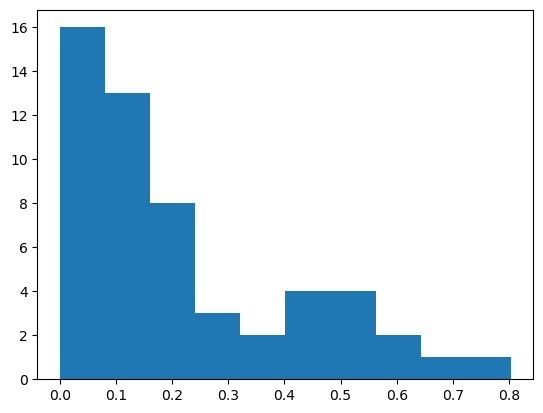

In [33]:
plt.hist(comparison["compare"])
plt.show()

### ROC curve for model from statsmodels

In [34]:
fpr, tpr, thresh = roc_curve(y_test, logMod2.predict(X_test))

In [35]:
roc_auc = auc(fpr, tpr)

Area under curve

In [36]:
roc_auc

0.8107156001892845

Plotting the ROC curve

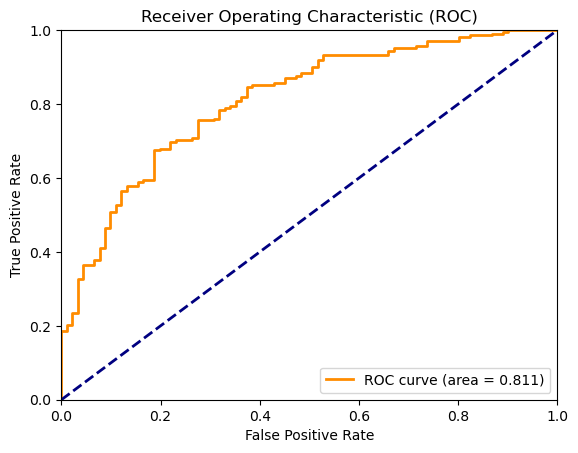

In [68]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label=f"ROC curve (area = {np.round(roc_auc, 3)})"
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

### Estimate optimal threshold using:

$\theta = \sqrt{(1 - FPR^2 + TPR^2)}$

In [72]:
t = np.argmax(np.sqrt((1- fpr**2 + tpr**2)))

In [73]:
thresh[t]

0.45481570145043154

### Checking performance of estimated threshold

In [74]:
print(classification_report(y_test, [0 if _ <= thresh[t] else 1 for _ in logMod2.predict(X_test)]))

              precision    recall  f1-score   support

           0       0.74      0.47      0.58        91
           1       0.80      0.93      0.86       209

    accuracy                           0.79       300
   macro avg       0.77      0.70      0.72       300
weighted avg       0.78      0.79      0.77       300



###  More accurate testing of thresholds relative to accuracy score 

In [75]:
accuracies = []
xx = np.linspace(0,1,1000)

for t in xx:

    accuracies.append(accuracy_score(y_test, [0 if _ <= t else 1 for _ in logMod2.predict(X_test)]))


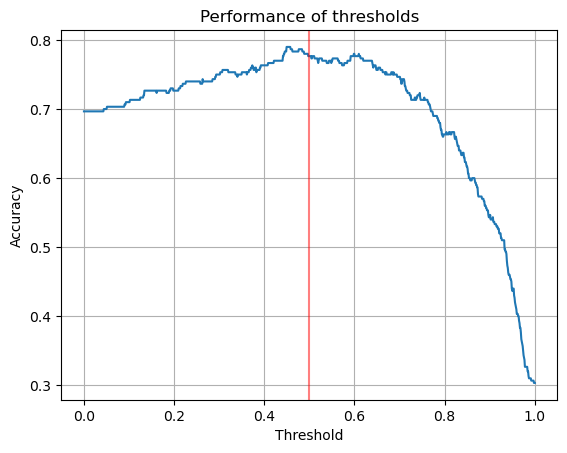

In [76]:
plt.plot(xx, accuracies)
plt.axvline(x=0.5, color="r", alpha=0.5)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Performance of thresholds")
plt.grid()

In [77]:
np.max(accuracies)

0.79

In [78]:
xx[np.argmax(accuracies)]

0.4494494494494494

### Confirming accuracy score for optimal threshold for model

In [79]:
tt = xx[np.argmax(accuracies)]

print(classification_report(y_test, [0 if _ <= tt else 1 for _ in logMod2.predict(X_test)]))

              precision    recall  f1-score   support

           0       0.75      0.46      0.57        91
           1       0.80      0.93      0.86       209

    accuracy                           0.79       300
   macro avg       0.77      0.70      0.72       300
weighted avg       0.78      0.79      0.77       300



## Comparing Alternative Feature Selections

### Model using only continuous and binary variables

In [80]:
logMod3 = LogisticRegression(max_iter=1000, solver="newton-cholesky")

In [81]:
cont_df = df.drop(columns=categorical)

In [48]:
cont_df.head()

,duration,amount,age,people_liable,telephone,foreign_worker,credit_risk
0,6,1169,67,1,1,1,1
1,48,5951,22,1,0,1,0
2,12,2096,49,2,0,1,1
3,42,7882,45,2,0,1,1
4,24,4870,53,2,0,1,0


In [49]:
X2 = cont_df.drop(columns="credit_risk")

In [50]:
y2 = cont_df["credit_risk"]

In [51]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [52]:
logMod3.fit(X_train2, y_train2)

LogisticRegression(max_iter=1000, solver='newton-cholesky')

In [53]:
yhat2 = logMod3.predict(X_test2)

In [54]:
print(classification_report(y_test2, yhat2))

              precision    recall  f1-score   support

           0       0.54      0.08      0.13        91
           1       0.71      0.97      0.82       209

    accuracy                           0.70       300
   macro avg       0.62      0.52      0.48       300
weighted avg       0.66      0.70      0.61       300



### Model using only non-binary categorical variables

In [55]:
logMod4 = LogisticRegression(max_iter=1000, solver="newton-cholesky")

In [56]:
cat_df = df.drop(columns=[_ for _ in df.columns if _ not in categorical])

In [57]:
cat_df = pd.get_dummies(data=cat_df, columns=cat_df.columns, drop_first=True)

In [58]:
cat_df.head()

,status_... >= 200 DM / salary for at least 1 year,status_0 <= ... < 200 DM,status_no checking account,credit_history_critical account/other credits existing,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,purpose_car (new),purpose_car (used),purpose_domestic appliances,...,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,number_credits_2,number_credits_3,number_credits_4,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0


In [59]:
X3 = cat_df

In [60]:
y3 = df["credit_risk"]

In [61]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [62]:
logMod4.fit(X_train3, y_train3)

LogisticRegression(max_iter=1000, solver='newton-cholesky')

In [63]:
yhat3 = logMod4.predict(X_test3)

In [64]:
print(classification_report(y_test3, yhat3))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        91
           1       0.78      0.89      0.83       209

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.67       300
weighted avg       0.73      0.75      0.73       300

